In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [221]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for null values

In [222]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

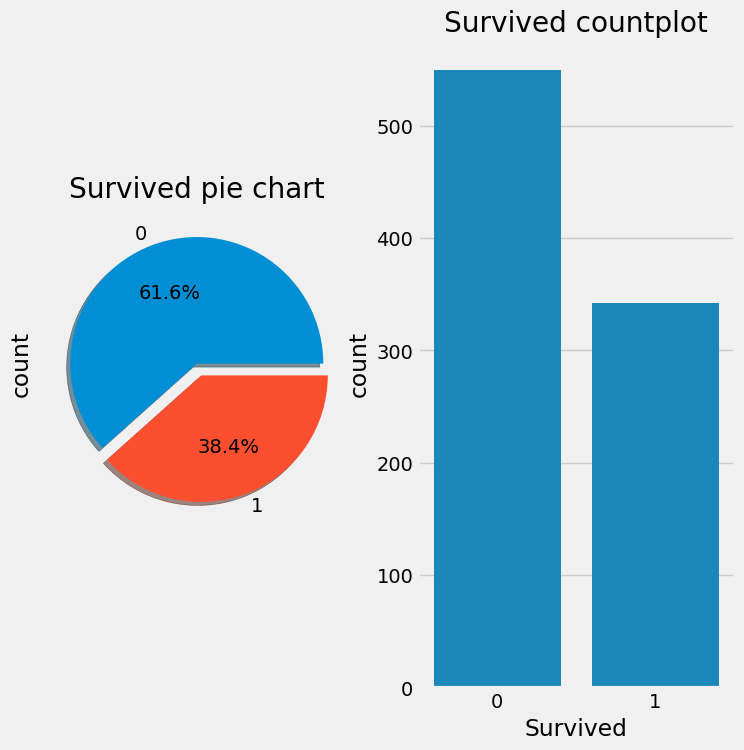

In [223]:
f, ax = plt.subplots(1,2,figsize=(8,8))
titanic_data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title("Survived pie chart")
sns.countplot(x="Survived", data = titanic_data, ax = ax[1])
ax[1].set_title("Survived countplot")
plt.show()

In [224]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analyze Sex column

In [225]:
titanic_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

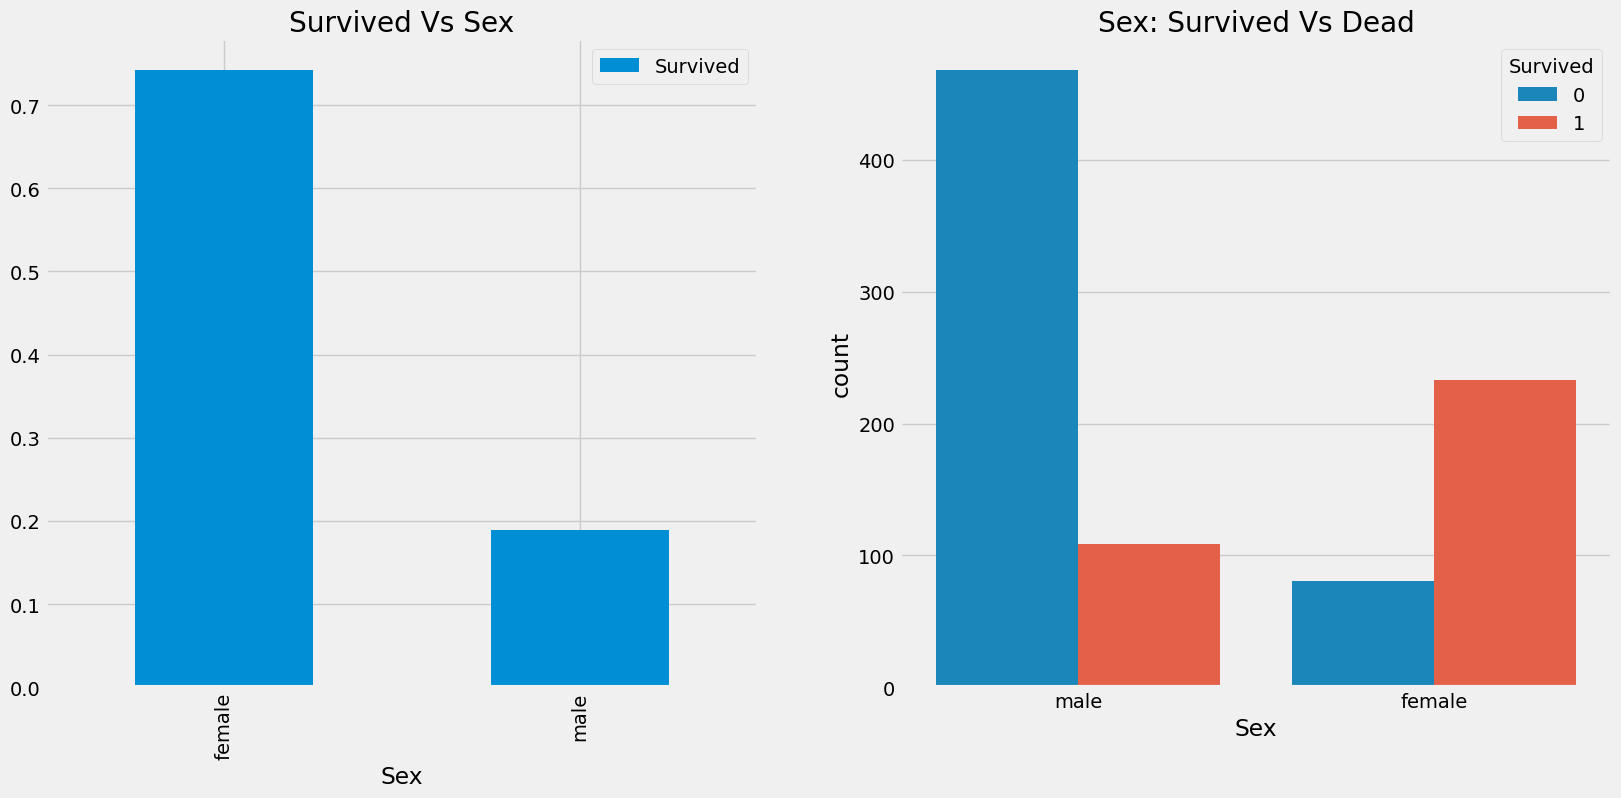

In [226]:
f, ax = plt.subplots(1,2,figsize=(18,8))
titanic_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived Vs Sex")
sns.countplot(x = "Sex", hue = 'Survived', data = titanic_data, ax = ax[1])
ax[1].set_title("Sex: Survived Vs Dead")
plt.show()

It is clearly visisble from the above output that the no. of women survived were more than men.

# Analyze P Class column

In [227]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


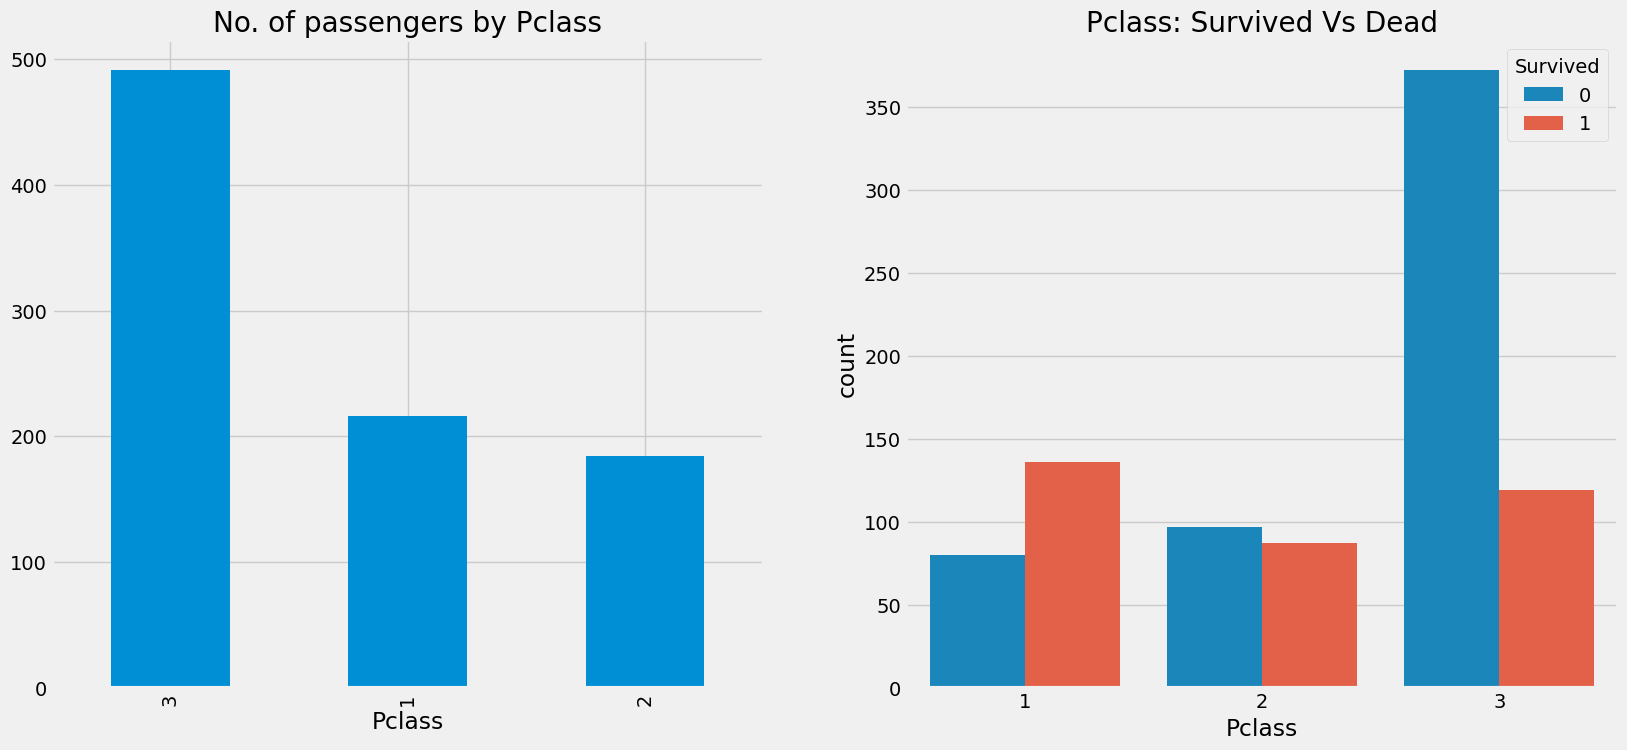

In [228]:
f, ax = plt.subplots(1,2,figsize = (18,8))
titanic_data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("No. of passengers by Pclass")
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_data, ax = ax[1])
ax[1].set_title("Pclass: Survived Vs Dead")
plt.show()

The above code says that the passengers with class 1 were given more priority during rescue operation.

In [229]:
pd.crosstab([titanic_data['Sex'], titanic_data['Survived']], titanic_data['Pclass'], margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

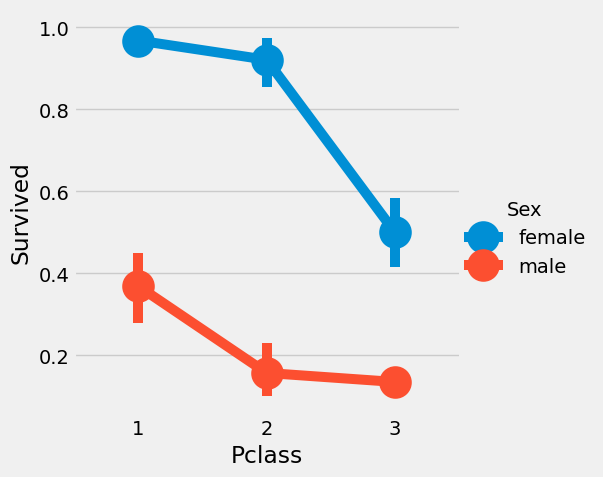

In [230]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data, kind='point')

As it is visible from the above factorplot, women were given more priority during rescue as their survival rate was much more than men. Hence we can say that the passenger class (Pclass) as well as the gender played an important rate in determing who survived and who was not.

# Analysis of Age column

In [231]:
titanic_data['Age'].min(), titanic_data['Age'].max(), titanic_data['Age'].mean()

(0.42, 80.0, 29.69911764705882)

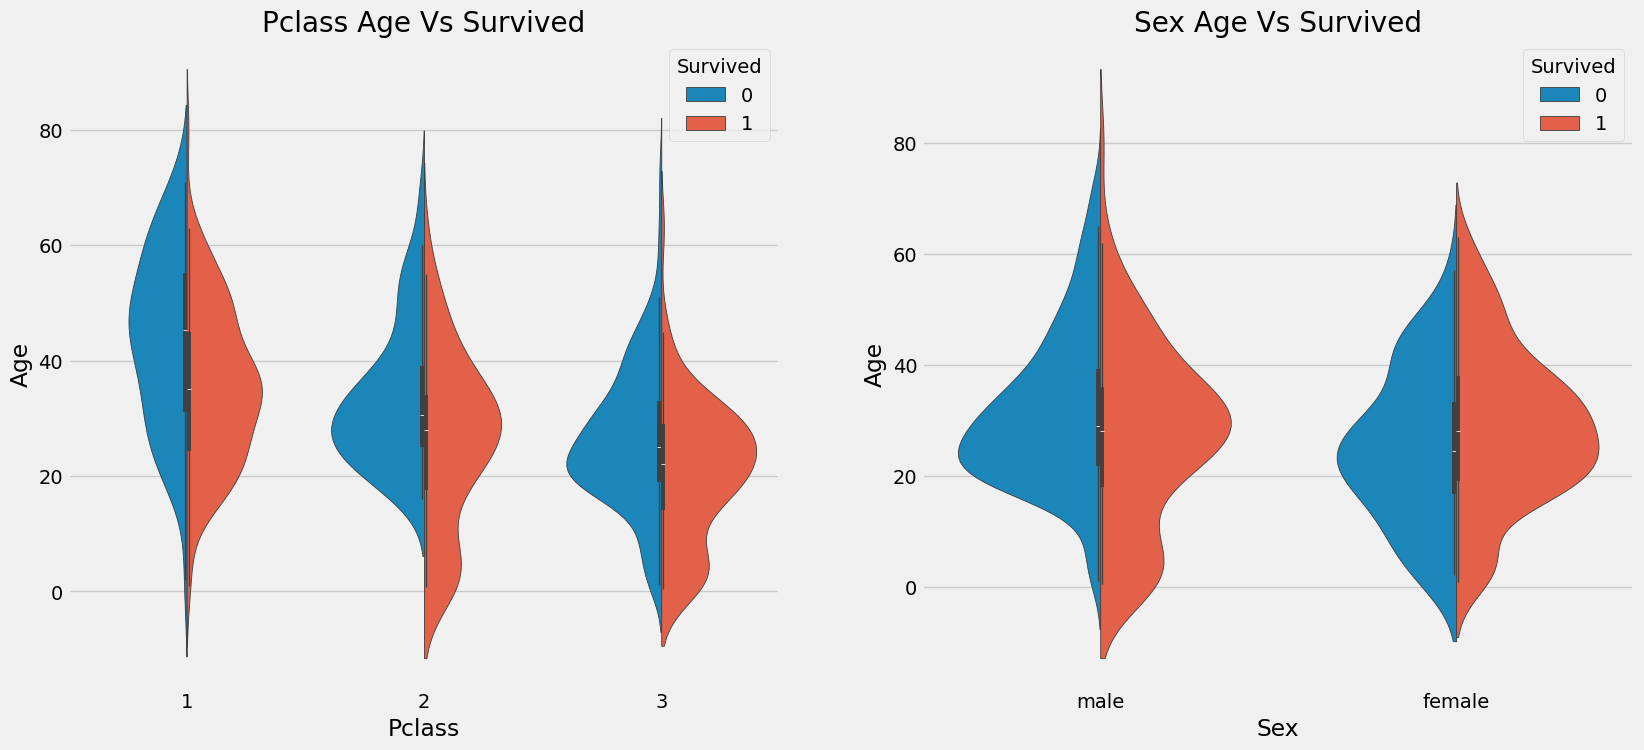

In [232]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot(x = "Pclass", y = "Age", hue = 'Survived', data = titanic_data, split = True, ax = ax[0])
ax[0].set_title("Pclass Age Vs Survived")
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = titanic_data, split = True, ax = ax[1])
ax[1].set_title("Sex Age Vs Survived")
plt.show()

- Survival chances increase with the Pclass. Higher the class, more is the survival chance.
- Females are given more priority.
- Ages between 20-40 have higher survival rate.
- As age increases, the survival rate reduces for men.

In [233]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, the Age column has many null values. Hence, to fill those values we'll have to check for the mean age values of the passengers. For this what we can do is check the name category of the passengers - Mr, Mrs, Miss, etc and accordingly fill in the mean values instead of the null values.

Creating a new column

In [234]:
titanic_data['Name_initial'] = 0
for i in titanic_data:
  titanic_data['Name_initial'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.')

In [235]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [236]:
pd.crosstab(titanic_data['Name_initial'], titanic_data['Sex'])

Sex,female,male
Name_initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [237]:
#Replace the initials with the correct initials
titanic_data['Name_initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [238]:
pd.crosstab(titanic_data['Name_initial'], titanic_data['Sex'])

Sex,female,male
Name_initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [239]:
titanic_data.groupby('Name_initial')['Age'].mean()

Name_initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling the Null values in Age column uisng the above values.

In [240]:
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Name_initial=='Mr'), 'Age']=33
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Name_initial=='Mrs'), 'Age']=36
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Name_initial=='Miss'), 'Age']=22
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Name_initial=='Master'), 'Age']=5
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Name_initial=='Mr'), 'Other']=46

In [241]:
titanic_data['Age'].isnull().sum()

0

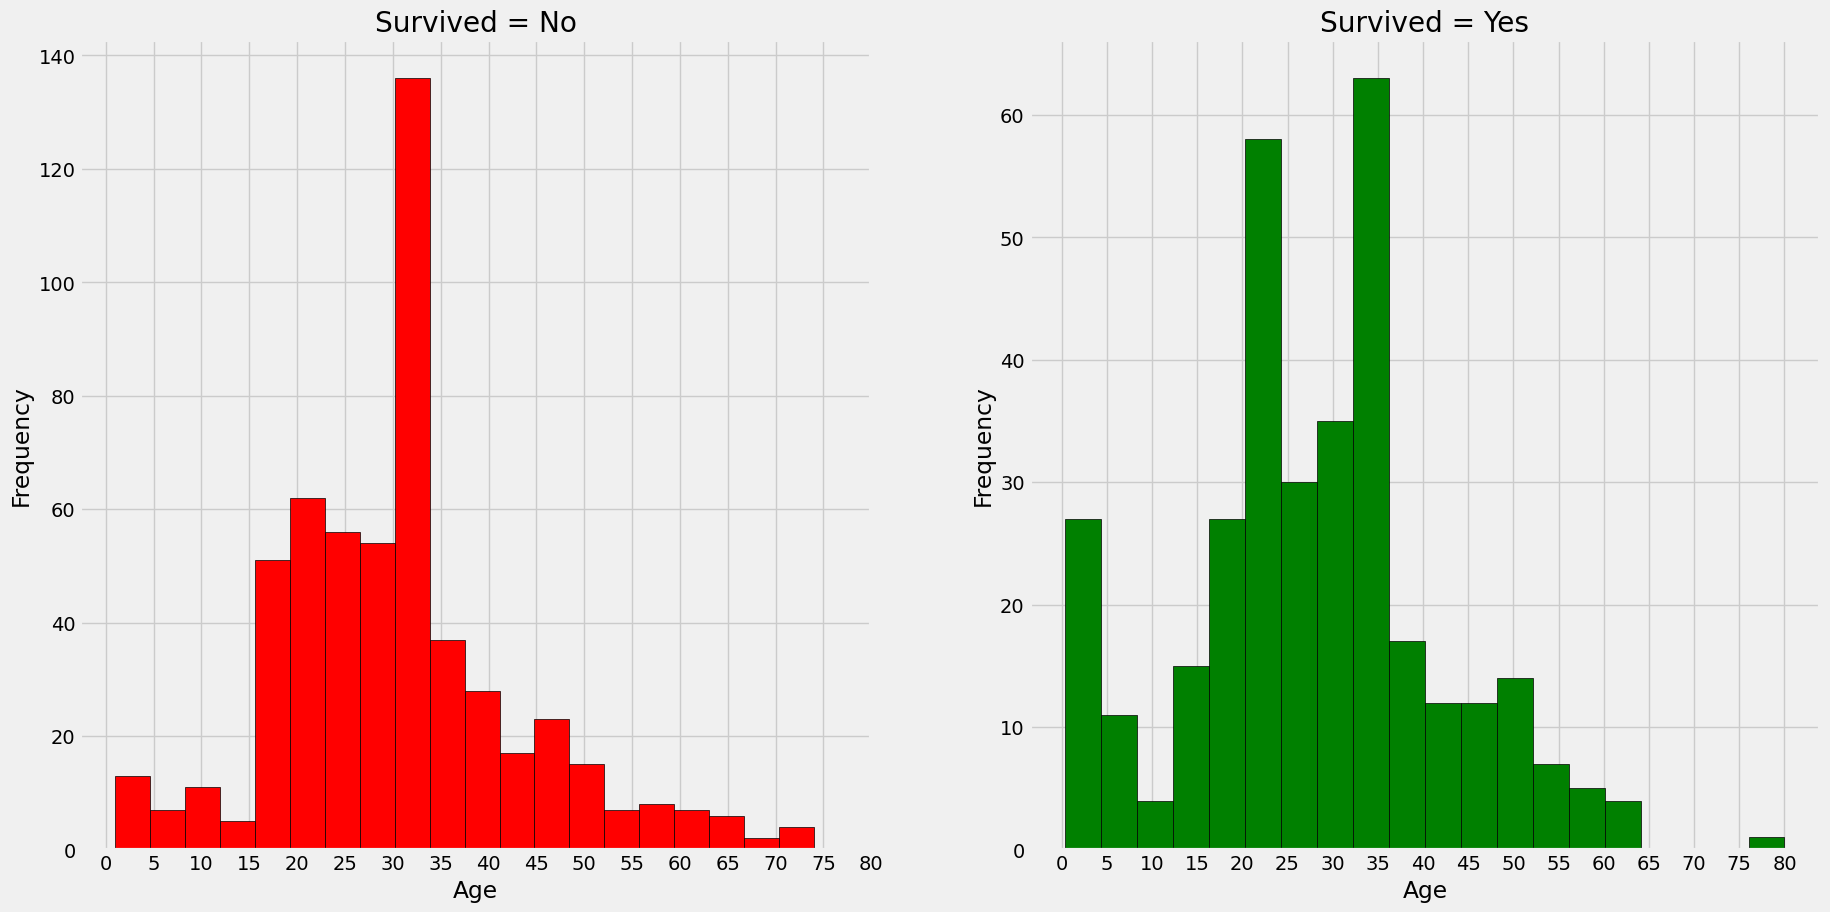

In [242]:
f, ax = plt.subplots(1,2, figsize = (20,10))
titanic_data[titanic_data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title("Survived = No")
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
ax[0].set_xlabel("Age")
titanic_data[titanic_data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title("Survived = Yes")
ax[1].set_xticks(x1)
ax[1].set_xlabel("Age")
plt.show()

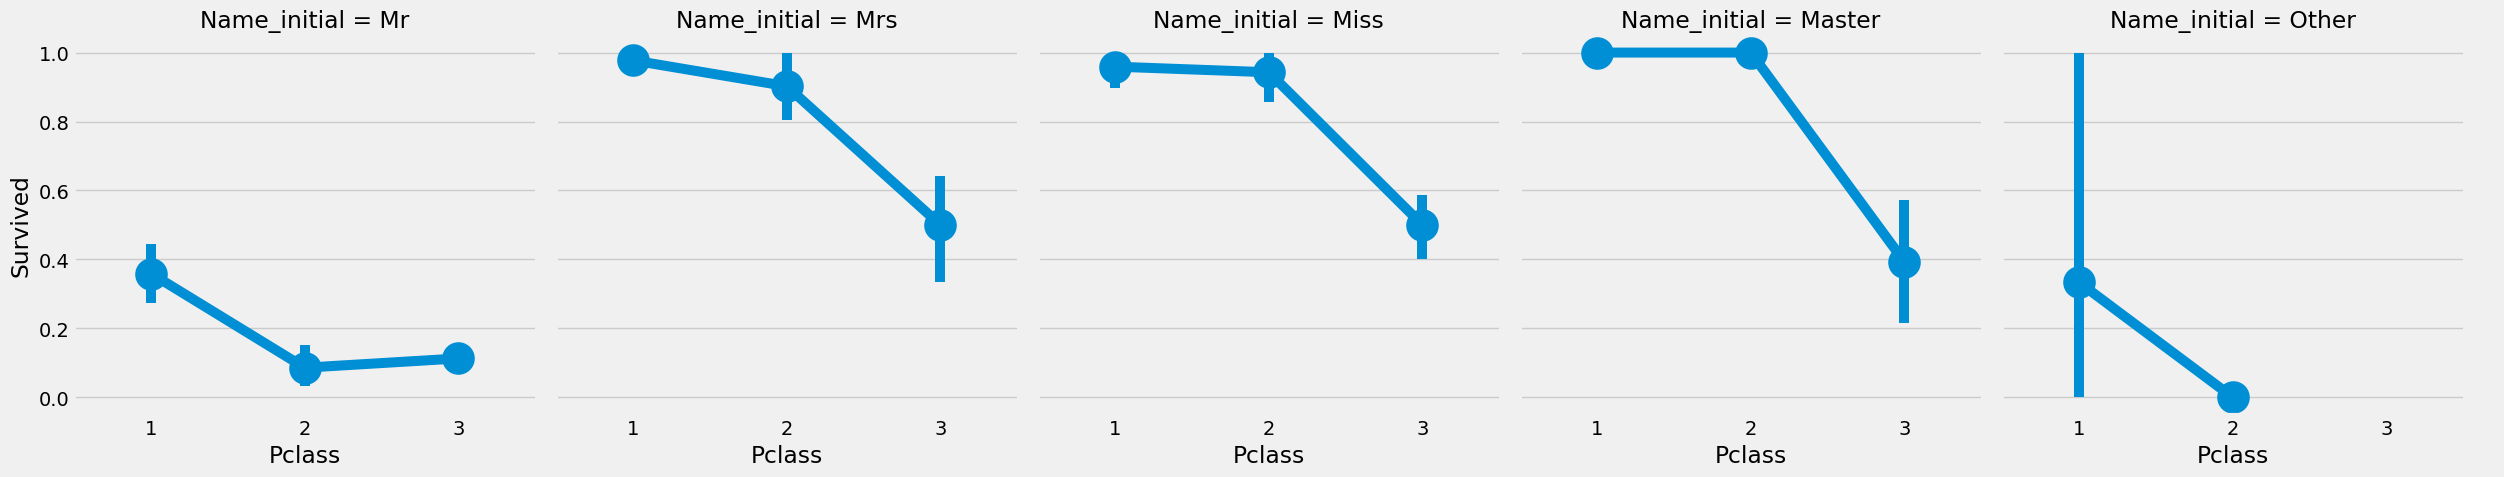

In [243]:
sns.catplot(x='Pclass', y='Survived', col = 'Name_initial', data = titanic_data, kind = 'point')

Master, Miss, and Mrs have more chances of survival.

# Analysis of Embarked column

In [244]:
pd.crosstab([titanic_data['Embarked'], titanic_data['Pclass']], [titanic_data['Sex'], titanic_data['Survived']], margins = True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

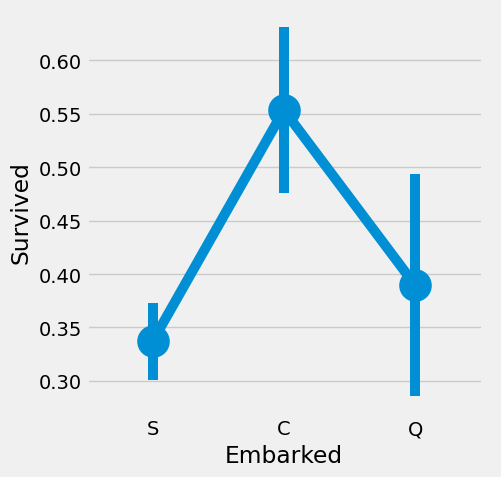

In [245]:
sns.catplot(x = 'Embarked', y = 'Survived', data = titanic_data, kind = 'point')
plt.show()

Text(0.5, 1.0, 'Embarked Vs Pclass')

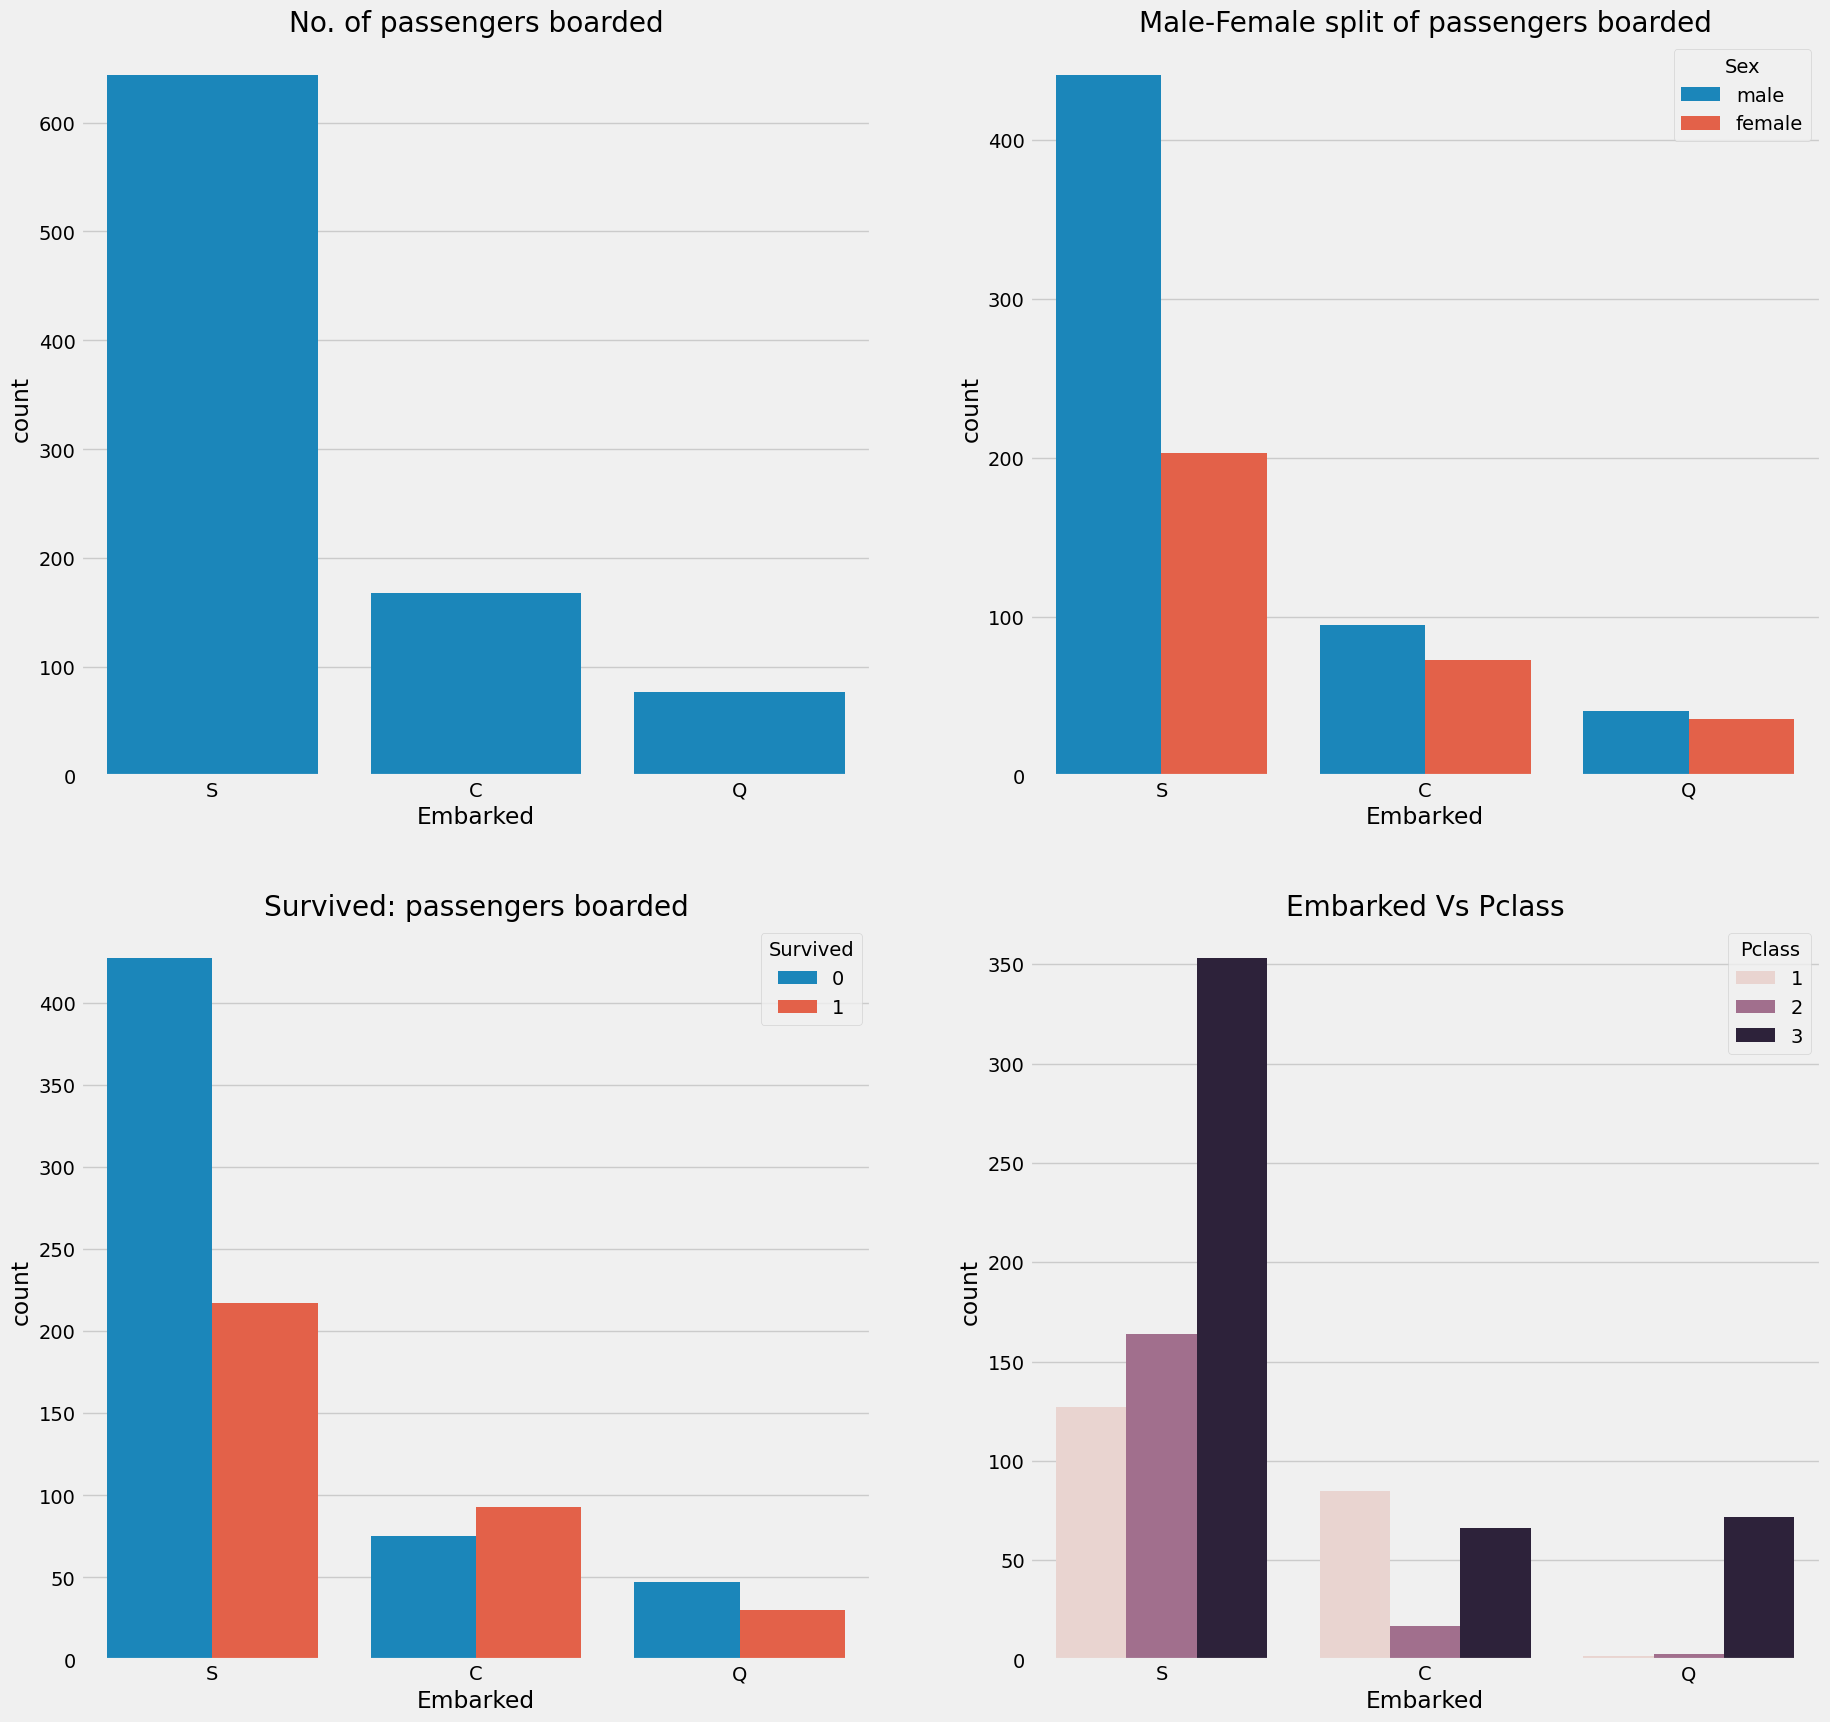

In [246]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.countplot(x = 'Embarked', data = titanic_data, ax = ax[0,0])
ax[0,0].set_title("No. of passengers boarded")

sns.countplot(x = 'Embarked', hue = 'Sex', data = titanic_data, ax = ax[0,1])
ax[0,1].set_title("Male-Female split of passengers boarded")

sns.countplot(x = 'Embarked', hue = 'Survived', data = titanic_data, ax = ax[1,0])
ax[1,0].set_title("Survived: passengers boarded")

sns.countplot(x = 'Embarked', hue = 'Pclass', data = titanic_data, ax = ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

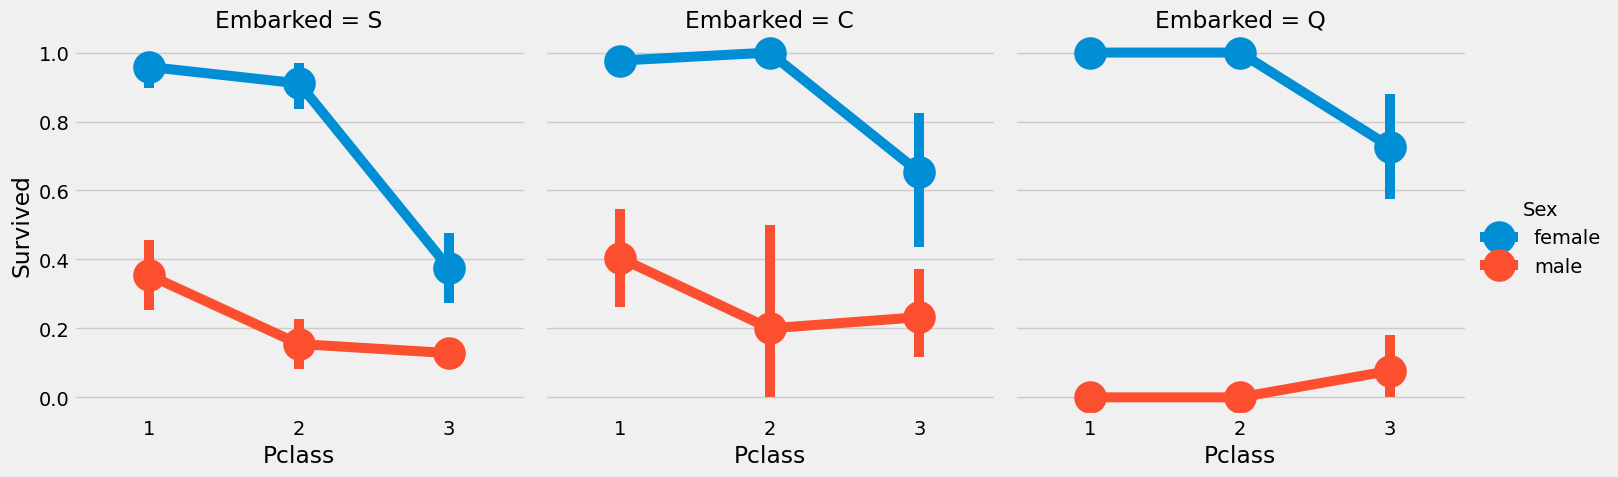

In [247]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = titanic_data, kind = 'point')
plt.show()

Irrespective of the port, the survival rate of women is more than men. But, Port S has the least survival rate for women whereas port Q has the least one for men.

In [248]:
titanic_data['Embarked'].isna().sum()

2

In [249]:
titanic_data['Embarked'].fillna('S', inplace = True)

In [250]:
titanic_data['Embarked'].isna().sum()

0

In [251]:
titanic_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Name_initial      0
Other           891
dtype: int64

# Analysis of SibSp column: Number of Siblings/Spouses Aboard

In [252]:
pd.crosstab(titanic_data['SibSp'], titanic_data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


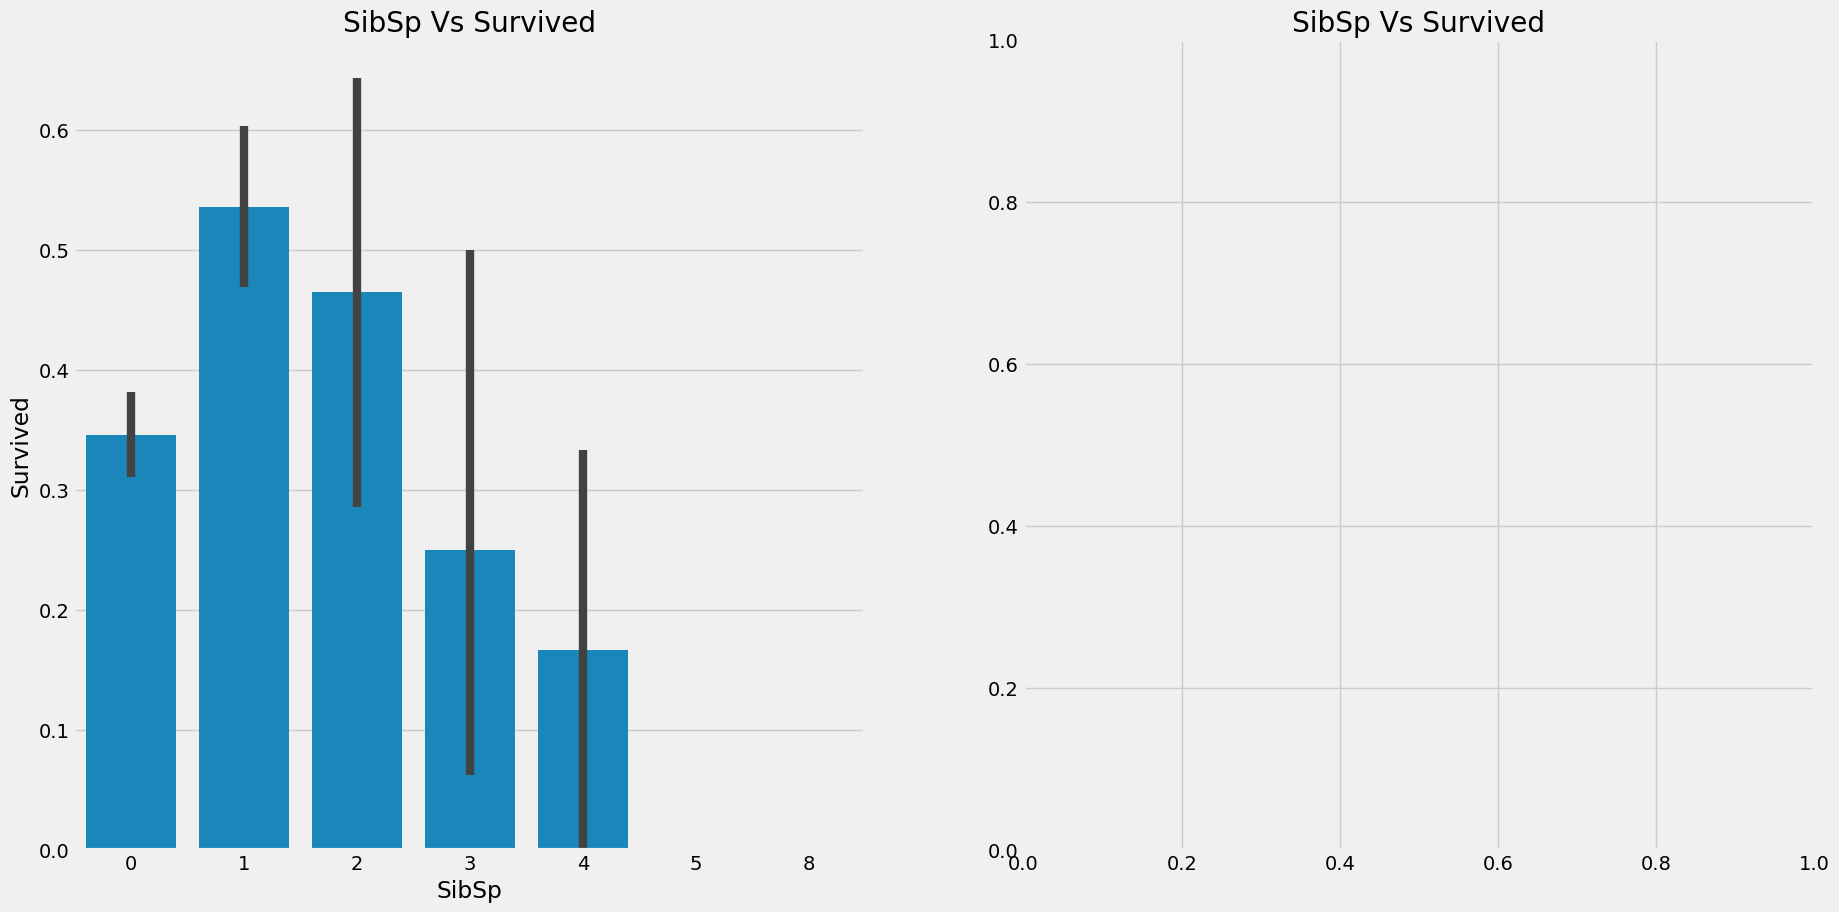

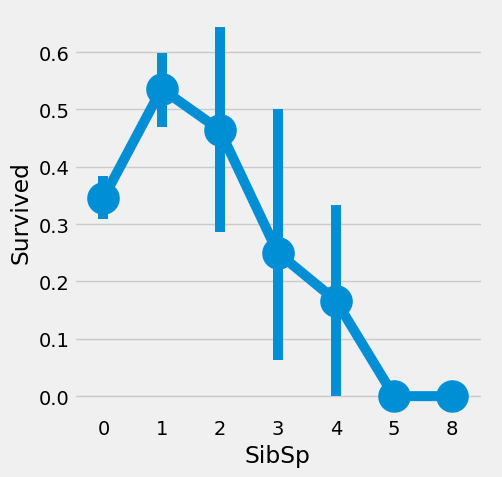

In [253]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x = 'SibSp', y = 'Survived', data = titanic_data, ax = ax[0])
ax[0].set_title("SibSp Vs Survived")
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic_data, ax = ax[1], kind = 'point')
ax[1].set_title('SibSp Vs Survived')
plt.show()

What we can infer from the above 2 graphs is that the survival rate of a person increases if he is alone: without anuy siblings or spouse. And it gradually decreases with the increase in number of siblings or spouses.

# Analysis of Fare column - continuous value

In [254]:
titanic_data['Fare'].min(), titanic_data['Fare'].max(), titanic_data['Fare'].mean()

(0.0, 512.3292, 32.204207968574636)

<ipython-input-255-8495bfa01a38>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data[titanic_data['Pclass']==1]['Fare'], ax = ax[0])
<ipython-input-255-8495bfa01a38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data[titanic_data['Pclass']==2]['Fare'], ax = ax[1])
<ipython-i

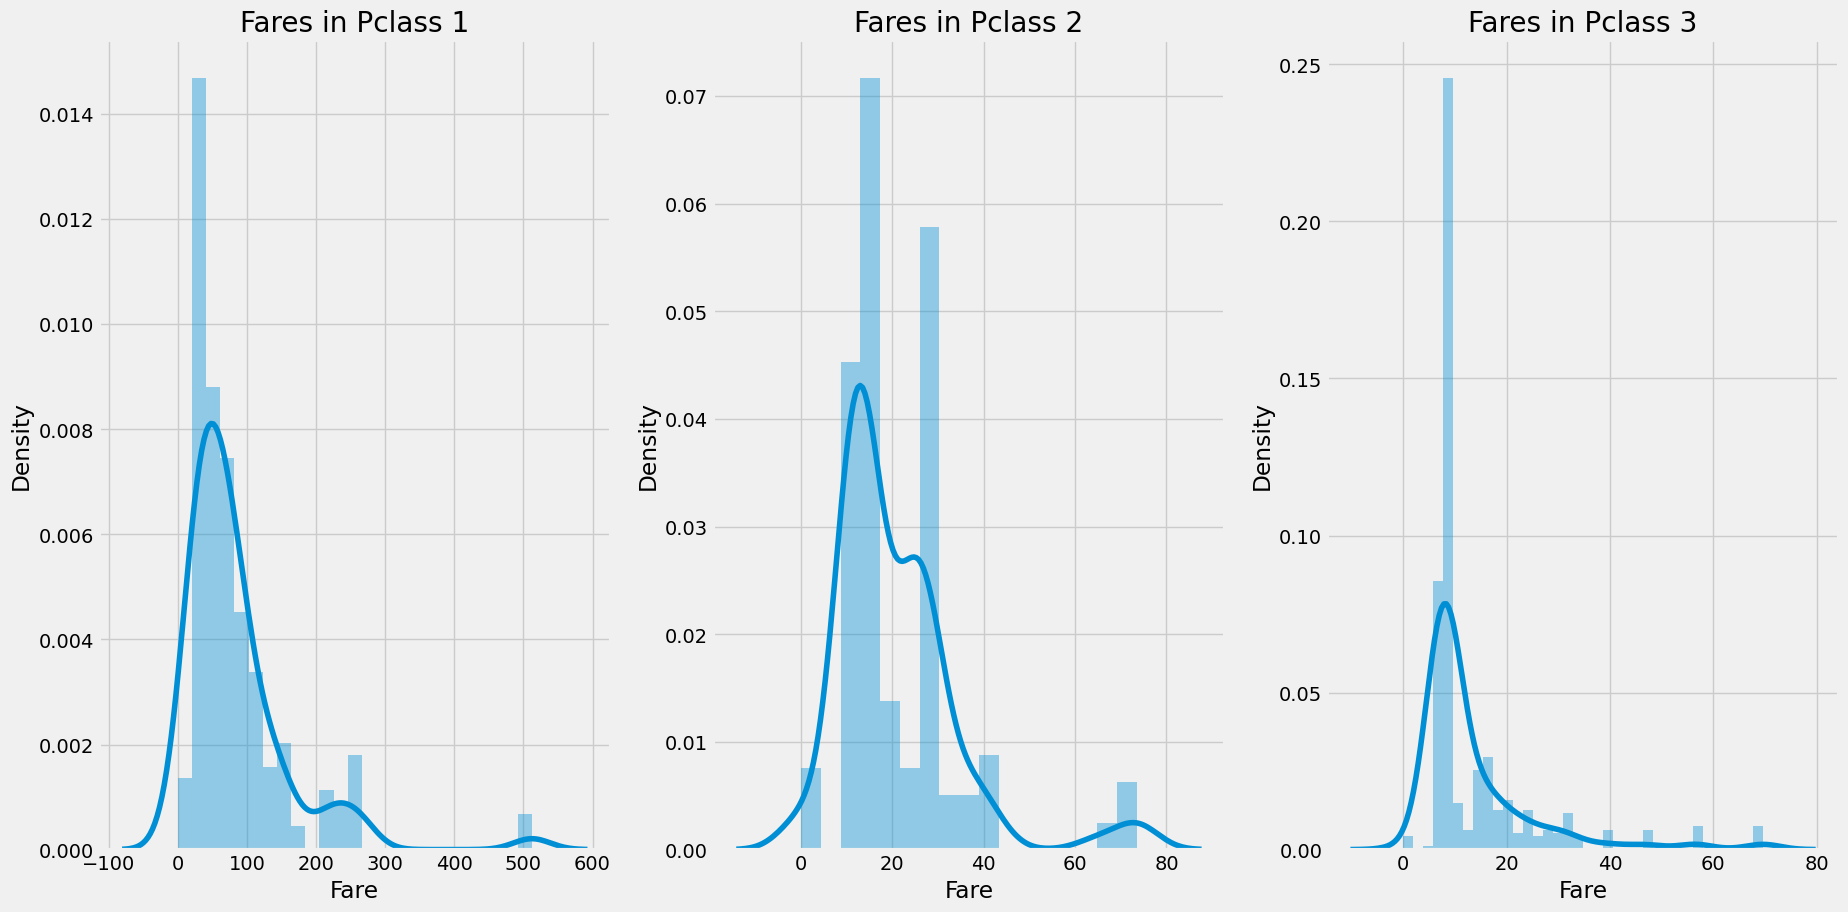

In [255]:
f, ax = plt.subplots(1,3, figsize = (20,10))
sns.distplot(titanic_data[titanic_data['Pclass']==1]['Fare'], ax = ax[0])
sns.distplot(titanic_data[titanic_data['Pclass']==2]['Fare'], ax = ax[1])
sns.distplot(titanic_data[titanic_data['Pclass']==3]['Fare'], ax = ax[2])
ax[0].set_title("Fares in Pclass 1")
ax[1].set_title("Fares in Pclass 2")
ax[2].set_title("Fares in Pclass 3")
plt.show()

# Correlation

In [256]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_initial',
       'Other'],
      dtype='object')

In [257]:
titanic_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Name_initial     object
Other           float64
dtype: object

In [258]:
titanic_data_integer = titanic_data.drop(columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_initial', 'Other'])

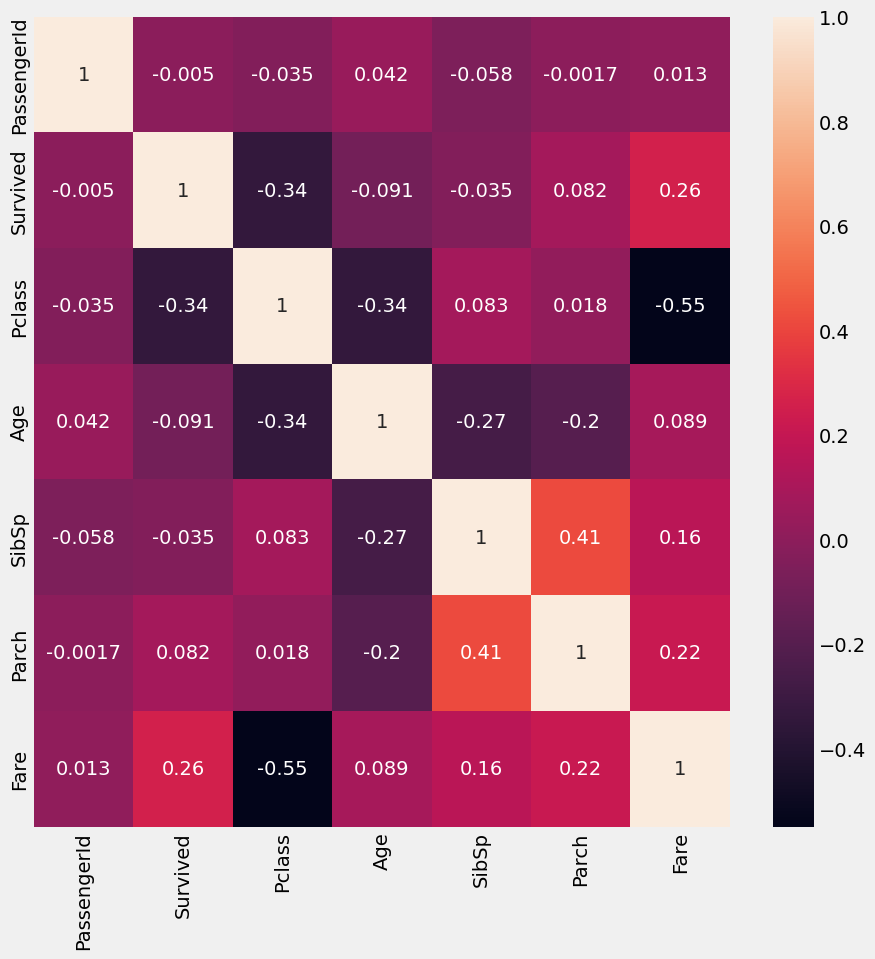

In [259]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data_integer.corr(), annot=True)
plt.show()

The above heatmap clearly shows that the Parch column and the SibSp column are the most correlated (0.41).

In [260]:
titanic_data.drop(columns = 'Other', inplace=True)

In [261]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Convert Age column (continuous value) to labels.

In [263]:
titanic_data['Age_category'] = 0
titanic_data.loc[titanic_data['Age']<=16, 'Age_category'] = 0
titanic_data.loc[(titanic_data['Age']>16)&(titanic_data['Age']<=32), 'Age_category'] = 1
titanic_data.loc[(titanic_data['Age']>32) & (titanic_data['Age']<=50), 'Age_category'] = 2
titanic_data.loc[(titanic_data['Age']>50) & (titanic_data['Age']<=64), 'Age_category'] = 3
titanic_data.loc[titanic_data['Age']>64, 'Age_category'] = 4
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_initial,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [264]:
titanic_data['Age_category'].value_counts()

Age_category
1    382
2    341
0    104
3     53
4     11
Name: count, dtype: int64

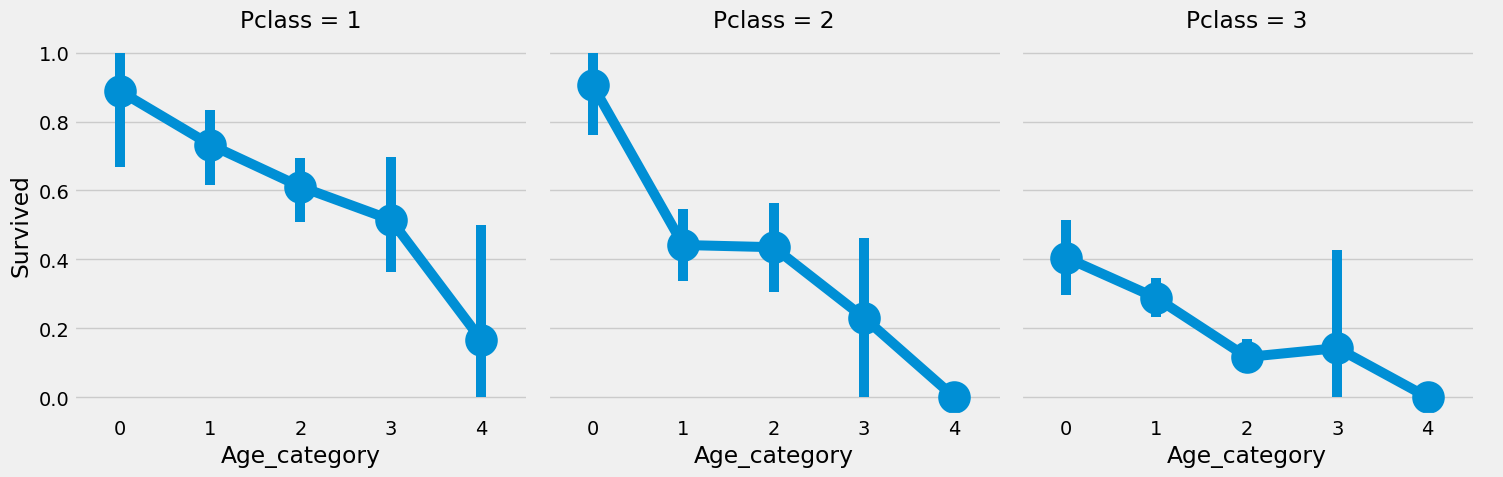

In [267]:
sns.catplot(x = 'Age_category', y = 'Survived', data = titanic_data, col = 'Pclass', kind = 'point')